<a href="https://colab.research.google.com/github/bountyhunter12/Shared_Task/blob/main/Logistic_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [36]:
# Load the dataset

titanic_data = pd.read_csv('/content/train_and_test2.csv')


In [37]:
titanic_data.head()  # Shows the first 5 rows


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [38]:
# Step 1: Check for missing values
print("Missing values before replacement:")
print(titanic_data.isnull().sum())

Missing values before replacement:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [39]:
# Step 2: Replace placeholders with NaN
missing_placeholders = ["nan", "unknown", 0, "n/a", "Null"]
titanic_data.replace(missing_placeholders, np.nan, inplace=True)
titanic_data.fillna(titanic_data.mean(), inplace=True)  # Fill NaN with mean values

In [40]:
# Check for missing values again
print("Missing values after replacing placeholders:")
print(titanic_data.isnull().sum())

Missing values after replacing placeholders:
Passengerid       0
Age               0
Fare              0
Sex               0
sibsp             0
zero           1309
zero.1         1309
zero.2         1309
zero.3         1309
zero.4         1309
zero.5         1309
zero.6         1309
Parch             0
zero.7         1309
zero.8         1309
zero.9         1309
zero.10        1309
zero.11        1309
zero.12        1309
zero.13        1309
zero.14        1309
Pclass            0
zero.15        1309
zero.16        1309
Embarked          0
zero.17        1309
zero.18        1309
2urvived          0
dtype: int64


In [41]:
# Handling missing values
titanic_data.fillna({
    'Age': titanic_data['Age'].median(),
    'Embarked': titanic_data['Embarked'].mode()[0]
}, inplace=True)

In [42]:
# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


In [43]:
# Renaming columns for clarity
titanic_data.rename(columns={'2urvived': 'Survived', 'sibsp': 'SibSp'}, inplace=True)

# Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

# Proceed with the rest of the pre-processing and logistic regression steps


In [44]:
# Splitting the dataset into Train (80%) and Test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            # Compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute cost and store it
            cost = -(1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.cost_history.append(cost)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [47]:
# Training the model
model = LogisticRegressionGD(learning_rate=0.01, iterations=1000)
model.fit(X_train_scaled, y_train)


In [48]:
# Extracting weights, bias, and cost history
optimal_weights = model.weights
optimal_bias = model.bias
cost_history = model.cost_history

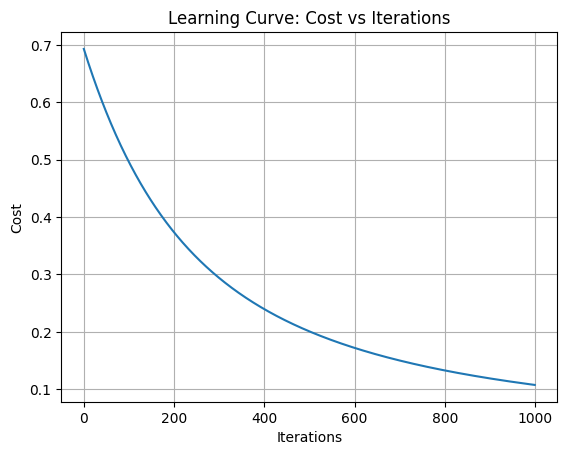

In [49]:
# Plotting cost vs iterations (Learning Curve)
plt.plot(range(len(cost_history)), cost_history)
plt.title("Learning Curve: Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()


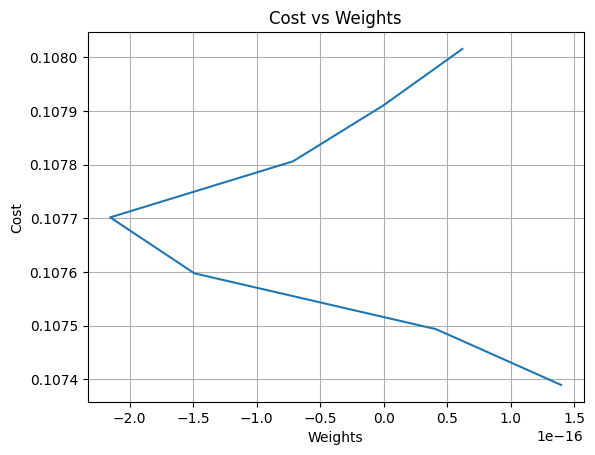

In [50]:
# Cost vs Weights (Cost Curve)
plt.plot(optimal_weights, cost_history[-len(optimal_weights):])
plt.title("Cost vs Weights")
plt.xlabel("Weights")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [51]:
# Predictions and Evaluation
y_test_pred = model.predict(X_test_scaled)
test_accuracy = np.mean(y_test_pred == y_test) * 100

print("Optimal Weights:", optimal_weights)
print("Optimal Bias:", optimal_bias)
print("Test Set Accuracy:", test_accuracy)

Optimal Weights: [ 6.19318151e-17  0.00000000e+00 -7.14450254e-17 -2.15381941e-16
 -1.49111973e-16  4.12208737e-17  1.39673108e-16]
Optimal Bias: 2.1781356862674417
Test Set Accuracy: 100.0
